In [1]:
! pip install matplotlib

In [2]:
import numpy as np
from numpy import random
import matplotlib
import matplotlib.pyplot as plt

## 3c Bayesian regression 

Generating data

Prior distribution:

In [4]:
mu = np.array([-5, 0])
sigma = np.array([[4,0],[0,4]])

Draw one sample from a multivariate distrubution - we will do this only once.

In [5]:
w_tilda = np.random.multivariate_normal(mu, sigma,1)

In [6]:
print(w_tilda)

[[-4.89753948 -0.82949732]]


Definte the distributions for the data $D_{1}$ and $D_{2}$

In [7]:
mu_d1 = np.array([0, 0])
sigma_d1 = np.array([[0.25,0],[0,0.25]]) 

In [8]:
mu_d2 = np.array([0.5, 0.5])
sigma_d2 = np.array([[0.01,0],[0,0.01]]) 

Draw 15 samples from $D_{1}$ and 30 from $D_{2}$:

In [10]:
x_d1 = np.random.multivariate_normal(mu_d1, sigma_d1,15)
x_d2 = np.random.multivariate_normal(mu_d2, sigma_d2,30)

For both sets of data, draw $y$ outputs using the observation model: $p(y|x,w) = \mathcal{N}(y; f(x,y), \sigma_{y}^2)$

In [28]:
sigma_y = 1

In [13]:
y = []
for i in x_d1:
    mu_y = np.dot(w_tilda, i)
    Sigma_y = 1
    y_d1_x = np.random.normal(mu_y, Sigma_y,1)
    y.append(y_d1_x)
for i in x_d2:
    mu_y = np.dot(w_tilda, i)
    Sigma_y = 1
    y_d2_x = np.random.normal(mu_y, Sigma_y,1)
    y.append(y_d2_x)

In [14]:
len(y)

45

Currently, $y$ is a list - we would like to turn it into an array for computations.

In [15]:
y = np.asarray(y)

In [16]:
y.shape

(45, 1)

We have now completed generating $D_{1}$ and $D_{2}$, as well as y.

### 3.a) 

Visualise the prior distribution and discuss the relationship between the parameters and the belief expressed by the prior.


Draw 400 weight vectors from the prior distriubtion:

In [17]:
weights = np.random.multivariate_normal(mu, sigma,400)

In [18]:
weights.shape

(400, 2)

Plot the weights and mark w_tilda with a cross.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


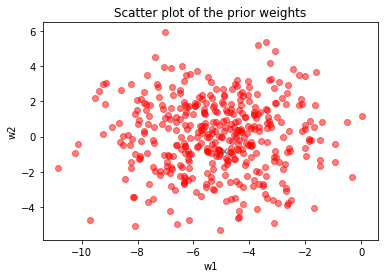

In [37]:
colors = (1,0,0)
colors_w_tilda = (0,0,0) 

plt.scatter(weights[:,0], weights[:,1], c=colors, alpha=0.5)
plt.scatter(w_tilda[:,0], w_tilda[:,1], marker = "x", c=colors_w_tilda, alpha=0.5)
plt.title('Scatter plot of the prior weights')
plt.xlabel('w1')
plt.ylabel('w2')
plt.show()

Our belief is that the variables $w_{1}$ and $w_{2}$ are not correlated, and that the mean of the distribution is around $w_{1} = -5$ and $w_{2} = 0$ 

### 3.b)

i) calculate the posterior $p(w|D_{1})$

Given the equation in the notes, we can write functions to compute the variance and mean of the posterior (assuing the prior and the posterior are both Gaussian):
$V_{N} = \sigma_{y}^{2} (\sigma_{y}^{2}\sigma_{prior}^{-1} + X^{T}X)^{-1}$
$w_{N} = V_{N}\sigma_{prior}^{-1}w_{0} + \frac{1}{\sigma_{y}^{2}}V_{N}X^{T}y$


In [27]:
def calc_variance(sigma_y, X, sigma_prior):
    return (sigma_y**2)*np.linalg.inv((sigma_y**2)*np.linalg.inv(sigma_prior) + np.dot(X.transpose(),X))

In [46]:
def calc_mean(sigma_y, sigma_prior, variance, mu, y, X):
    return np.dot(np.dot(variance,np.linalg.inv(sigma_prior)), mu.ravel()) + np.dot(np.dot(variance,X.transpose()), y).transpose()

In [47]:
variance_posterior_d1 = calc_variance(sigma_y, x_d1, sigma)
variance_posterior_d2 = calc_variance(sigma_y, x_d2, sigma)

In [55]:
variance_posterior_d1

array([[ 0.14817223,  0.01877264],
       [ 0.01877264,  0.25685884]])

In [56]:
variance_posterior_d2

array([[ 0.76407154, -0.66163121],
       [-0.66163121,  0.68636667]])

To calculate the mean, we should split $y$ into 2 arrays.

In [48]:
y_d1 = y[:15,:]
y_d2 = y[15:,:]

In [49]:
mean_posterior_d1 = calc_mean(sigma_y, sigma, variance_posterior_d1, mu, y_d1 , x_d1)
mean_posterior_d2 = calc_mean(sigma_y, sigma, variance_posterior_d2, mu, y_d2, x_d2)

In [57]:
mean_posterior_d1

array([[-4.70384674, -0.66911152]])

In [59]:
mean_posterior_d2

array([[-5.45656767, -0.37311777]])

Let's'write a plot_posterior function

In [50]:
def plot_posterior(mean_posterior, variance_posterior):
    weights = np.random.multivariate_normal(mean_posterior.ravel(), variance_posterior, 400);
    colors = (1,0,0)
    colors_w_tilda = (0,0,0) 
    # area = np.pi*3
    plt.title('Scatter plot of the posterior weights')
    plt.scatter(weights[:,0], weights[:,1], c=colors, alpha=0.5)
    plt.scatter(w_tilda[:,0], w_tilda[:,1], marker = "x", c=colors_w_tilda, alpha=0.5)
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.show()

Side comment: Question: why do I have to do .ravel()? Something must've gone wrong with the original shapes. But it still works.

Plot the posterior for $D_{1}$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


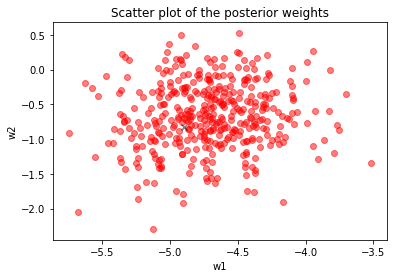

In [51]:
plot_posterior(mean_posterior_d1, variance_posterior_d1)

Now, plot $D_{2}$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


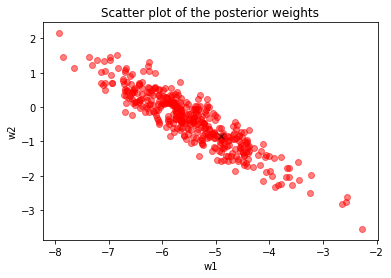

In [53]:
plot_posterior(mean_posterior_d2, variance_posterior_d2)

We observe a strong negative correlation between $w_{1}$ and $w_{2}$.

### 3.b.iii 

Calculate the posterior after seeing both $D_{1}$ and $D_{2}$

In [61]:
variance_posterior_d1d2 = calc_variance(sigma_y, np.concatenate((x_d1,x_d2),axis = 0), sigma)

In [67]:
variance_posterior_d1d2

array([[ 0.09610058, -0.05488062],
       [-0.05488062,  0.11137491]])

In [62]:
mean_posterior_d1d2 = calc_mean(sigma_y, sigma, variance_posterior_d1d2, mu, y, np.concatenate((x_d1,x_d2),axis = 0))

In [68]:
mean_posterior_d1d2

array([[-4.87109874, -0.83801222]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


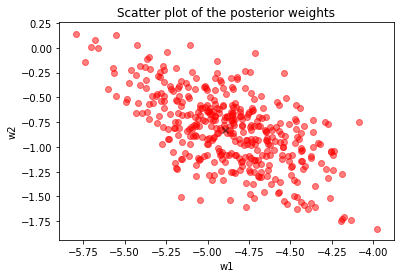

In [66]:
plot_posterior(mean_posterior_d1d2, variance_posterior_d1d2)

### 3.b.iv

In [69]:
var_posterior_d2_with_d1_prior = calc_variance(sigma_y, x_d2, variance_posterior_d1)

In [71]:
var_posterior_d2_with_d1_prior

array([[ 0.09610058, -0.05488062],
       [-0.05488062,  0.11137491]])

In [77]:
mean_posterior_d2_with_d1_prior = calc_mean(sigma_y, variance_posterior_d1, var_posterior_d2_with_d1_prior, 
                                           mean_posterior_d1, y_d2, x_d2)

In [72]:
mean_posterior_d2_with_d1_prior

array([[-4.87109874, -0.83801222]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


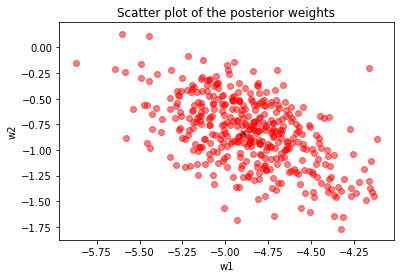

In [78]:
plot_posterior(mean_posterior_d2_with_d1_prior, var_posterior_d2_with_d1_prior)

We observe that the mean and variance are the same as in 3.b.iii. In other words, the order in which we see the data doesn't matter. We can show that we will obtain the same results if we tried setting $D_{2}$ as a prior, and $D_{1}$ after.

In [73]:
var_posterior_d1_with_d2_prior = calc_variance(sigma_y, x_d1, variance_posterior_d2)

In [74]:
var_posterior_d1_with_d2_prior

array([[ 0.09610058, -0.05488062],
       [-0.05488062,  0.11137491]])

In [75]:
mean_posterior_d1_with_d2_prior = calc_mean(sigma_y, variance_posterior_d2, var_posterior_d1_with_d2_prior, 
                                           mean_posterior_d2, y_d1, x_d1)

In [76]:
mean_posterior_d1_with_d2_prior

array([[-4.87109874, -0.83801222]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


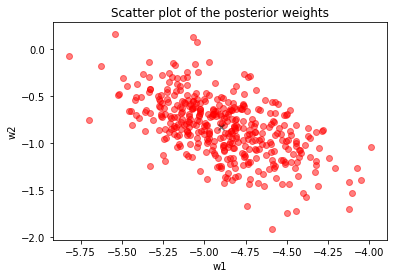

In [79]:
plot_posterior(mean_posterior_d1_with_d2_prior, var_posterior_d1_with_d2_prior)